In [1]:
import numpy as np
# import cv2 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [2]:
data = pd.read_csv("dataset/data.csv",sep=",")
y_data = pd.read_csv("dataset/labels.csv")
 

In [3]:
y_data = y_data.rename(columns={'10': 'label'})

In [4]:
y_data['label'] = y_data['label'].replace(10, 0)

# Si vous avez plusieurs colonnes où vous souhaitez effectuer le remplacement, vous pouvez le faire pour toutes les colonnes en une seule fois
# y_data = y_data.replace({'colonne1': {10: 0}, 'colonne2': {10: 0}, ...})

# Enregistrez le DataFrame modifié si nécessaire
# y_data.to_csv("dataset/labels_modifies.csv", index=False)

In [6]:
data.shape

(4999, 400)

# shuffle

In [5]:
merged_data = pd.merge(data,y_data,left_index=True , right_index=True)
shuffled_data = merged_data.sample(frac=1).reset_index(drop=True)

data = shuffled_data.drop(columns = 'label')
y_data = shuffled_data['label']

In [9]:
data.shape

(4999, 400)

In [6]:
import tensorflow as tf

class MyClassifier(tf.keras.Model):
    def __init__(self, k=16, dropout_rate=0.5):  # Ajout de dropout_rate comme argument
        super(MyClassifier, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(k, kernel_size=(3, 3), activation='relu')
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(k*2, kernel_size=(3, 3), activation='relu')
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='sigmoid')
        self.dropout = tf.keras.layers.Dropout(rate=dropout_rate)  # Ajout de la couche Dropout
        self.dense2 = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self, inputs):
        # print(f'input {inputs.shape}')
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout(x)  # Ajout de la couche Dropout
        return self.dense2(x)


In [7]:
# Conversion des étiquettes en one-hot encoding
y_data_one_hot = to_categorical(y_data)
print(y_data_one_hot[:3])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
# Convertir les DataFrames en tableaux NumPy
X_train_array = data.values
Y_train_array = y_data.values

# Redimensionner les données d'entrée
data = X_train_array.reshape((X_train_array.shape[0], 20, 20, 1))


In [ ]:
print(data.shape)
print(y_data.shape)

In [25]:
# scaler = StandardScaler()
# scaler.fit(data)
# data_scaled = scaler.transform(data)
X_train, X_test, Y_train, Y_test = train_test_split(data , y_data_one_hot , test_size=0.2 )
X_train , X_val , Y_train , Y_val = train_test_split(X_train,Y_train , test_size= 0.2)


In [ ]:
print(f'X_train : {X_train.shape} Y_train {Y_train.shape}')
print(f'X_val : {X_val.shape} Y_val {Y_val.shape}')
print(f'X_test : {X_test.shape} Y_test {Y_test.shape}')


In [10]:
X_train = X_train.astype('float64')
X_val = X_val.astype('float64')
X_test = X_test.astype('float64')

Y_train = Y_train.astype('int64')
Y_val = Y_val.astype('int64')
Y_test = Y_test.astype('int64')


In [11]:
model = MyClassifier()

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy() #dans le cas ou l'etiquette  sont 1,2,3... 

In [12]:
model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
Y_train.shape

In [13]:
history= model.fit(X_train , Y_train ,epochs=10, batch_size=8, validation_data=(X_val , Y_val))

Epoch 1/10


input (None, 20, 20, 1)
input (None, 20, 20, 1)
400/400 [==============================] - 9s 11ms/step - loss: 2.1818 - accuracy: 0.2407 - val_loss: 1.2594 - val_accuracy: 0.6825
Epoch 2/10
400/400 [==============================] - 4s 10ms/step - loss: 1.1150 - accuracy: 0.6339 - val_loss: 0.5377 - val_accuracy: 0.8925
Epoch 3/10
400/400 [==============================] - 5s 12ms/step - loss: 0.5732 - accuracy: 0.8353 - val_loss: 0.3003 - val_accuracy: 0.9362
Epoch 4/10
400/400 [==============================] - 5s 13ms/step - loss: 0.3899 - accuracy: 0.8959 - val_loss: 0.1989 - val_accuracy: 0.9500
Epoch 5/10
400/400 [==============================] - 5s 13ms/step - loss: 0.2890 - accuracy: 0.9253 - val_loss: 0.1890 - val_accuracy: 0.9525
Epoch 6/10
400/400 [==============================] - 6s 15ms/step - loss: 0.2461 - accuracy: 0.9325 - val_loss: 0.1645 - val_accuracy: 0.9550
Epoch 7/10
400/400 [==============================] - 5s 13ms/step - loss: 0.2161 - accuracy: 0.9434 - va

In [14]:
model.evaluate(X_test,Y_test)

input (None, 20, 20, 1)
32/32 [==============================] - 1s 7ms/step - loss: 0.1425 - accuracy: 0.9560


[0.14248932898044586, 0.9559999704360962]

In [15]:
model.predict(X_test[120:121])

input (None, 20, 20, 1)
1/1 [==============================] - 1s 527ms/step


array([[1.2769559e-01, 7.9073710e-04, 6.6861355e-01, 8.8023515e-03,
        8.9441583e-04, 2.6279062e-02, 1.5847936e-01, 7.7156274e-04,
        7.4971835e-03, 1.7627551e-04]], dtype=float32)

In [16]:
# Supposons que X_test[120:121] est une seule instance que vous souhaitez prédire
instance_to_predict = X_test[120:121]

# Utilisez model.predict pour obtenir les probabilités prédites
predicted_probabilities = model.predict(instance_to_predict)

# Utilisez argmax pour obtenir l'indice de la classe avec la probabilité la plus élevée
predicted_class_index = np.argmax(predicted_probabilities)
true_class_index = np.argmax(Y_test[120:121])
# Affichez l'indice de la classe prédite
print("Indice de la classe prédite :", predicted_class_index , " , true classe : ", true_class_index)

1/1 [==============================] - 0s 134ms/step
Indice de la classe prédite : 2  , true classe :  2


In [ ]:
# model.build(input_shape=(None, 400))  # Assurez-vous que la forme d'entrée correspond à votre modèle
# model.summary()

# ACC && LOSS

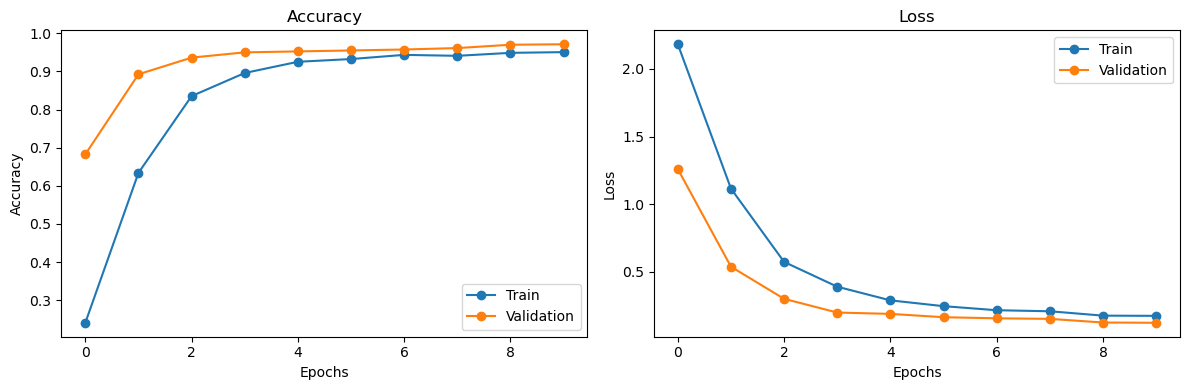

In [19]:
# Afficher les courbes d'accuracy et de loss
plt.figure(figsize=(12, 4))

# Courbe d'accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation', linestyle='-', marker='o')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Courbe de loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation', linestyle='-', marker='o')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Afficher les courbes
plt.tight_layout()
plt.show()

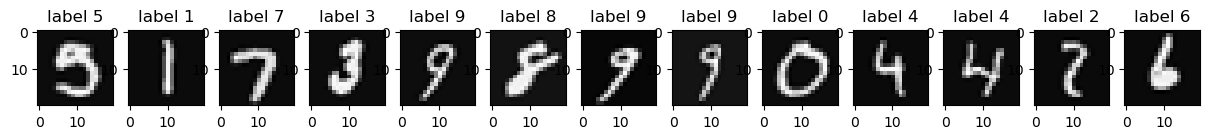

In [21]:
plt.figure(figsize=(15,8))
for i in range(13): #note: each 500 lines, there is a new value
    c = random.randint(data.shape[0]) #pick a random line from the dataset 
    # genere des chiffre aleatoire de 0 a X.shape[0] que veux dire de (0 ,nombre tuple) 
    a = data[c,:].reshape((20, 20)) #shape of one number in the image 
    # les données sont en format plat donc on doit les transformer en 2D
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    # Cette ligne crée un sous-graphique dans une grille d'une ligne et 13 colonnes, puis sélectionne le sous-graphique correspondant à la position actuelle i+1 dans cette grille.
    plt.title('label '+ str(y_data[c]))
    plt.imshow(a,cmap='gray')

In [37]:
# Prédire les classes pour les données de test
X_test = X_test.astype('float64')
Y_pred = model.predict(X_test)

# Obtenir les indices des classes prédites
Y_pred_indices = np.argmax(Y_pred, axis=1)

# Obtenir les indices des classes réelles dans Y_test
Y_test_indices = np.argmax(Y_test, axis=1)

32/32 [==============================] - 0s 6ms/step


In [35]:
print(Y_test.shape)

(1000, 10)


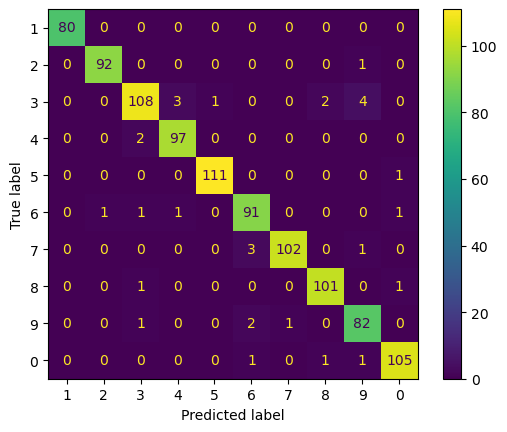

In [38]:
from sklearn.metrics import confusion_matrix
CNN_ = confusion_matrix(Y_test_indices, Y_pred_indices)

cm_display = metrics.ConfusionMatrixDisplay(CNN_ , display_labels = [1,  2,  3,  4,  5,  6,  7,  8,  9, 0])
cm_display.plot()
plt.show()